In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin

In [2]:
men = pd.read_csv("men_results.csv", parse_dates=["date"])
women = pd.read_csv("women_results.csv", parse_dates=["date"])

In [3]:
men["tournament"] = men["tournament"].astype("category")
women["tournament"] = women["tournament"].astype("category")
print(men.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 2.1+ MB
None


In [4]:
men_fifa = men[men["tournament"] == "FIFA World Cup"]
men_fifa = men_fifa[men_fifa["date"] > "2002-01-01"]
men_fifa.info()
women_fifa = women[women["tournament"] == "FIFA World Cup"]
women_fifa = women_fifa[women_fifa["date"] > "2002-01-01"]
women_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 25164 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  384 non-null    int64         
 1   date        384 non-null    datetime64[ns]
 2   home_team   384 non-null    object        
 3   away_team   384 non-null    object        
 4   home_score  384 non-null    int64         
 5   away_score  384 non-null    int64         
 6   tournament  384 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(3), object(2)
memory usage: 26.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1600 to 4469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  200 non-null    int64         
 1   date        200 non-null    datetime64[ns]
 2   home_team   200 non-null    object        
 3   away_team   200 non-null    obje

In [5]:
men_fifa["total_goals"] = men_fifa["home_score"] + men_fifa["away_score"]
women_fifa["total_goals"] = women_fifa["home_score"] + women_fifa["away_score"]

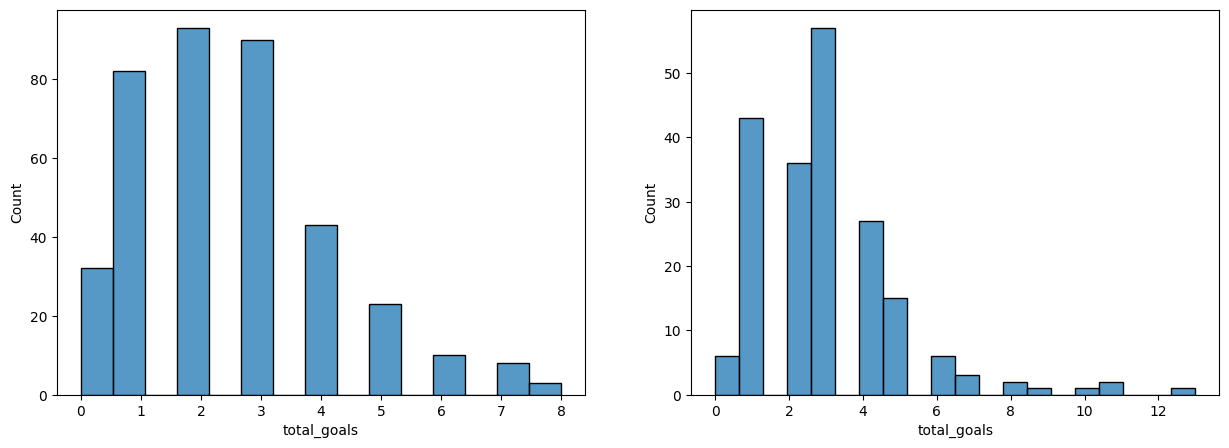

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))
sns.histplot(data = men_fifa, x = "total_goals", ax = ax1)
sns.histplot(data = women_fifa, x = "total_goals", ax = ax2)
plt.show()

In [7]:
# normality not satisfied
test = pingouin.mwu(y = men_fifa["total_goals"], x = women_fifa["total_goals"], alternative = "greater")
p_val = test.iloc[0,2]

In [8]:
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

In [9]:
result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': np.float64(0.0051066098254436395), 'result': 'reject'}
